In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [137]:
df = pd.read_csv("candy-data.csv")
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [139]:
df["sugarpercent"] = (df["sugarpercent"]*100).astype("int64")
df["pricepercent"] = (df["pricepercent"] * 100).astype("int64")
df["winpercent"] = round(df["winpercent"]).astype("int64")

In [140]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,73,86,67
1,3 Musketeers,1,0,0,0,1,0,0,1,0,60,51,68
2,One dime,0,0,0,0,0,0,0,0,0,1,11,32
3,One quarter,0,0,0,0,0,0,0,0,0,1,51,46
4,Air Heads,0,1,0,0,0,0,0,0,0,90,51,52


In [141]:
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [142]:
df.drop("competitorname", axis = 1, inplace = True)

In [143]:
df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,73,86,67
1,1,0,0,0,1,0,0,1,0,60,51,68
2,0,0,0,0,0,0,0,0,0,1,11,32
3,0,0,0,0,0,0,0,0,0,1,51,46
4,0,1,0,0,0,0,0,0,0,90,51,52


C:\Users\Mathan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mathan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


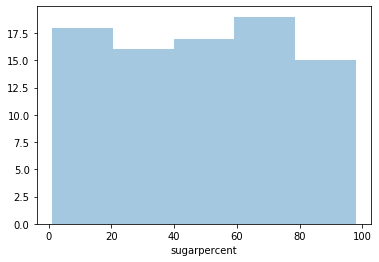

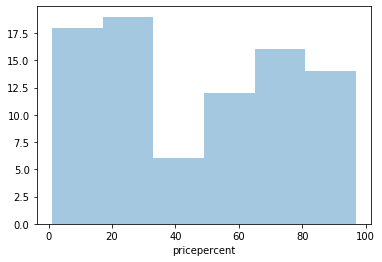

In [144]:
col = ["sugarpercent", "pricepercent"]
for i in range(2):
    plt.subplots(0, i)
    sns.distplot(df[col[i]], kde = False)

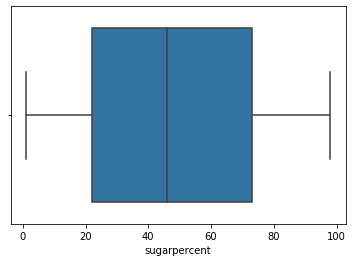

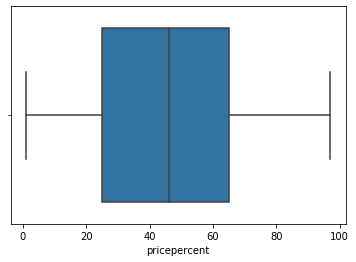

In [145]:
col = ["sugarpercent", "pricepercent"]
for i in range(2):
    plt.subplots(0, i)
    sns.boxplot(data = df, x = col[i])

In [146]:
X = df.drop("winpercent", axis = 1)
y = df["winpercent"]

In [147]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 3)

In [148]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit(X_test)

In [149]:
import statsmodels.api as sm

In [151]:
lm_1 = sm.OLS(y_train, X_train).fit()

In [152]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     5.886
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           2.98e-06
Time:                        00:38:01   Log-Likelihood:                -253.26
No. Observations:                  68   AIC:                             530.5
Df Residuals:                      56   BIC:                             557.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               34.6802      5.061  

In [153]:
y_pred = lm_1.predict(X_test)

In [154]:
len(y_pred)

17

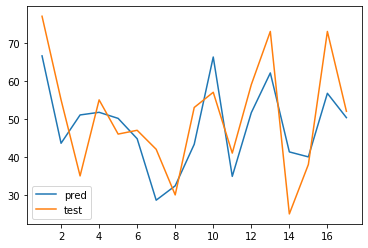

In [155]:
c = list(range(1, 18))
plt.plot(c, y_pred)
plt.plot(c, y_test)
plt.legend(["pred", "test"])

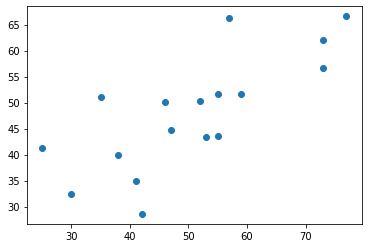

In [156]:
plt.scatter(y_test, y_pred)


In [157]:
mean_squared_error(y_test, y_pred) ** 0.5

9.827960982015934

In [159]:
accuracy_score(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets